## Exploratory Visual Analysis

In [15]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, PolynomialFeatures 

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [16]:
train = pd.read_csv('../datasets/train.csv')

kaggle = pd.read_csv('../datasets/test 2.csv')

train.head()

,id,pid,ms_subclass,ms_zoning,lot_frontage,lot_area,street,lot_shape,land_contour,utilities,...,square_footage,bldg_type_1Fam,bldg_type_2fmCon,bldg_type_Duplex,bldg_type_Twnhs,bldg_type_TwnhsE,kitchen_qual_Ex,kitchen_qual_Fa,kitchen_qual_Gd,kitchen_qual_TA
0,109,533352170,60,RL,0.0,13517,Pave,IR1,Lvl,AllPub,...,2204.0,1,0,0,0,0,0,0,1,0
1,544,531379050,60,RL,43.0,11492,Pave,IR1,Lvl,AllPub,...,3035.0,1,0,0,0,0,0,0,1,0
2,153,535304180,20,RL,68.0,7922,Pave,Reg,Lvl,AllPub,...,2114.0,1,0,0,0,0,0,0,1,0
3,318,916386060,60,RL,73.0,9802,Pave,Reg,Lvl,AllPub,...,1828.0,1,0,0,0,0,0,0,0,1
4,255,906425045,50,RL,82.0,14235,Pave,IR1,Lvl,AllPub,...,2121.0,1,0,0,0,0,0,0,0,1


In [17]:
train.corr()[['saleprice']].sort_values(by = 'saleprice', ascending = False)

/var/folders/np/hm339m411_30q030vqxtjdy80000gn/T/ipykernel_11260/4189176062.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  train.corr()[['saleprice']].sort_values(by = 'saleprice', ascending = False)


,saleprice
saleprice,1.000000
overall_qual,0.800028
square_footage,0.779302
gr_liv_area,0.697032
garage_area,0.650097
garage_cars,0.648007
total_bsmt_sf,0.628894
1st_flr_sf,0.618345
year_built,0.571726
kitchen_qual_Ex,0.551320


In [18]:
train.isnull().sum().sort_values(ascending = False)

id                 0
functional         0
garage_cond        0
garage_qual        0
garage_area        0
                  ..
exter_qual         0
mas_vnr_area       0
mas_vnr_type       0
exterior_2nd       0
kitchen_qual_TA    0
Length: 84, dtype: int64

## Housing cost distribution in Ames.

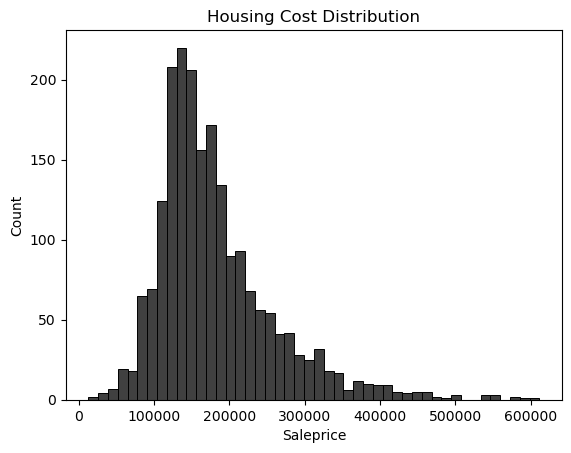

<Figure size 640x480 with 0 Axes>

In [19]:
sns.histplot(train['saleprice'],color = 'black')
plt.title('Housing Cost Distribution')
plt.xlabel('Saleprice')
plt.show()

plt.savefig('../images/imagehousing.png', bbox_inches = 'tight')

## Square footage relation to sale price.

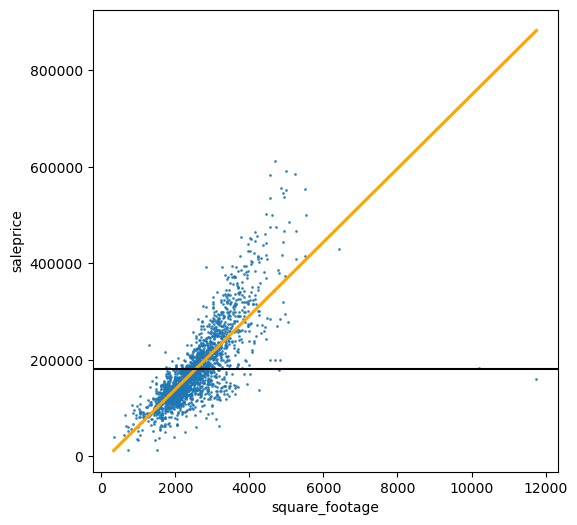

In [8]:
plt.figure(figsize = (6,6))
sns.regplot(x = 'square_footage', y = 'saleprice', data = train, ci = None,
           scatter_kws = {'s': 1},
           line_kws = {'color': 'orange'})
plt.axhline(train['saleprice'].mean(), color = 'black')
plt.xlabel('square_footage')
plt.ylabel('saleprice')

plt.savefig('../images/imagesqr.png', bbox_inches = 'tight')

## Heatmap of features to see the best correlated features to sale price.

/var/folders/np/hm339m411_30q030vqxtjdy80000gn/T/ipykernel_11260/2951480549.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(train.corr()[['saleprice']].sort_values(by = 'saleprice', ascending = False),


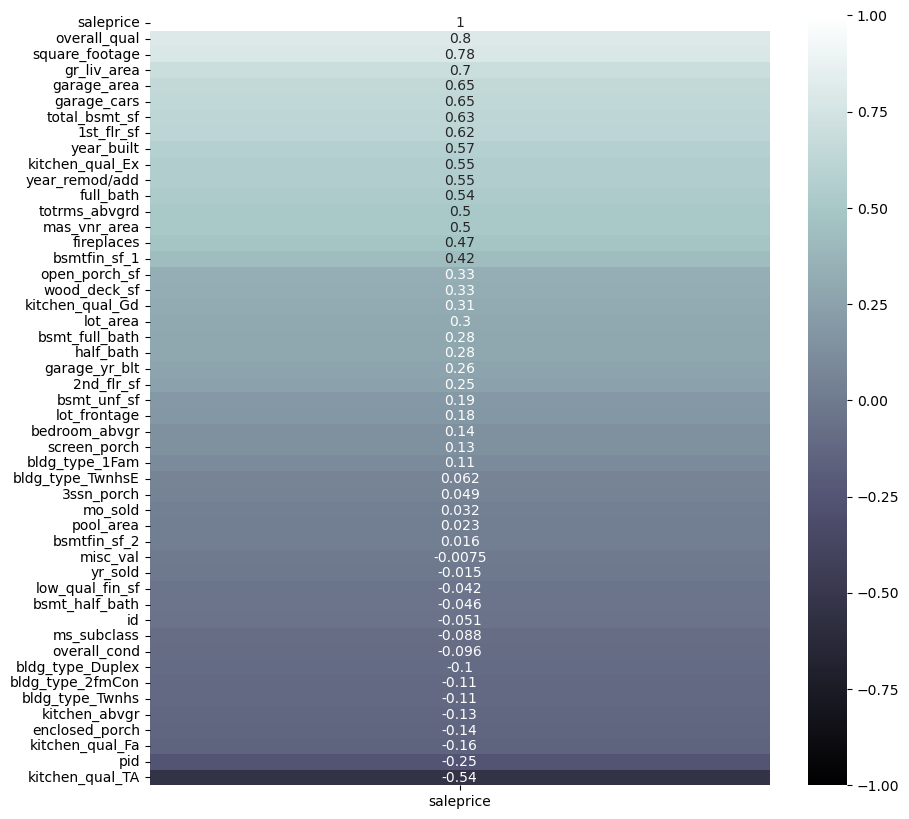

In [13]:
plt.figure(figsize = (10,10))
sns.heatmap(train.corr()[['saleprice']].sort_values(by = 'saleprice', ascending = False),
           vmin = -1,
           vmax = 1,
           cmap = 'bone',
           annot = True)

plt.savefig('../images/heat.png', bbox_inches = 'tight')

In [65]:
train['saleprice'].mean()

181534.626159102

## All scatter plots below are just looking at having a positive correlation with the increase in sale price to become portions of my features.

Text(0, 0.5, 'saleprice')

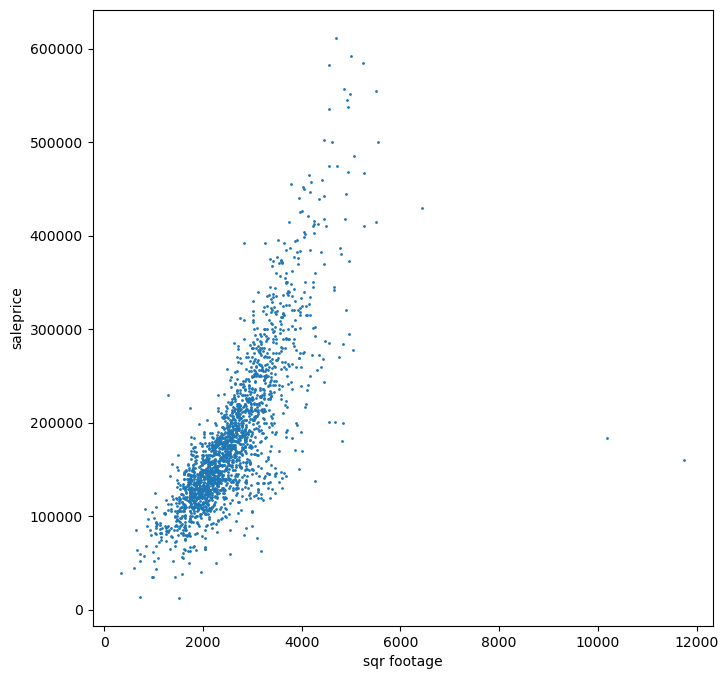

In [94]:
plt.figure(figsize = (8,8))
plt.scatter(train['square_footage'], train['saleprice'], s = 1)
plt.xlabel('sqr footage')
plt.ylabel('saleprice')

Text(0, 0.5, 'saleprice')

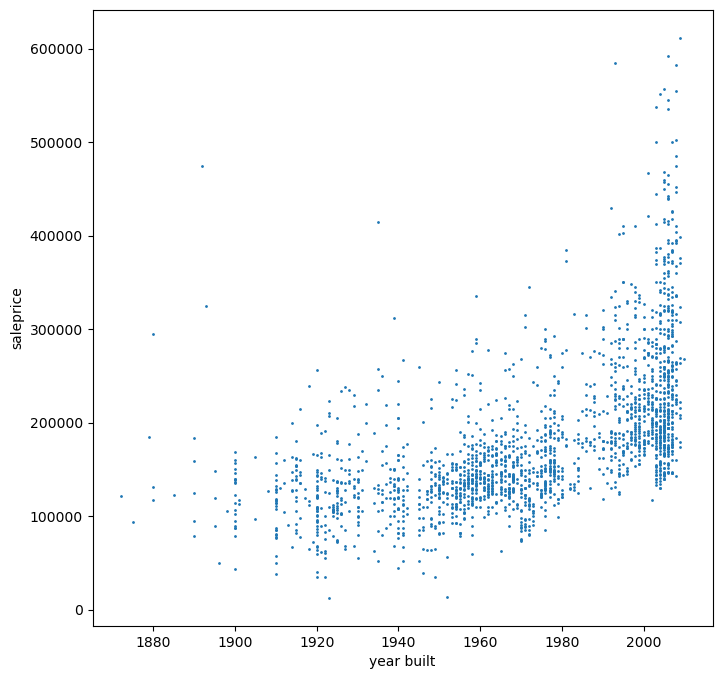

In [96]:
plt.figure(figsize = (8,8))
plt.scatter(train['year_built'], train['saleprice'], s = 1)
plt.xlabel('year built')
plt.ylabel('saleprice')

Text(0, 0.5, 'saleprice')

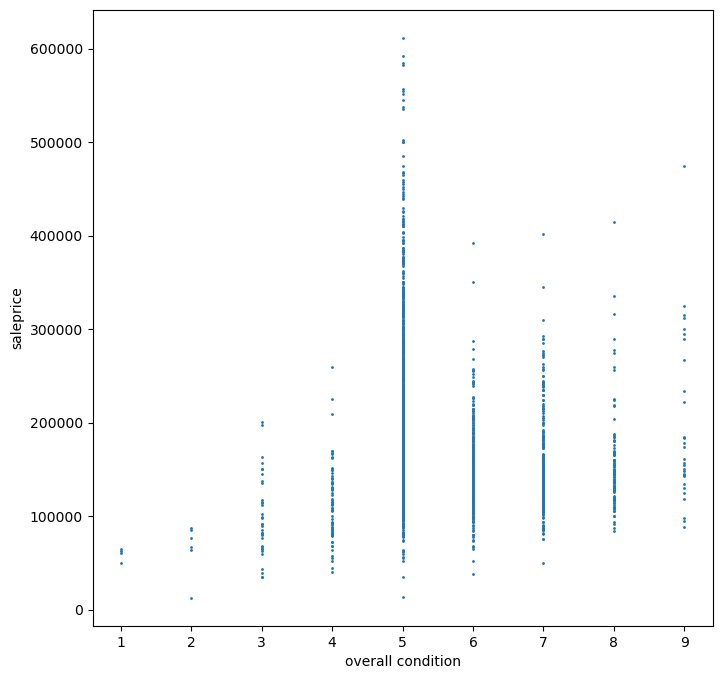

In [97]:
plt.figure(figsize = (8,8))
plt.scatter(train['overall_cond'], train['saleprice'], s = 1)
plt.xlabel('overall condition')
plt.ylabel('saleprice')

Text(0, 0.5, 'saleprice')

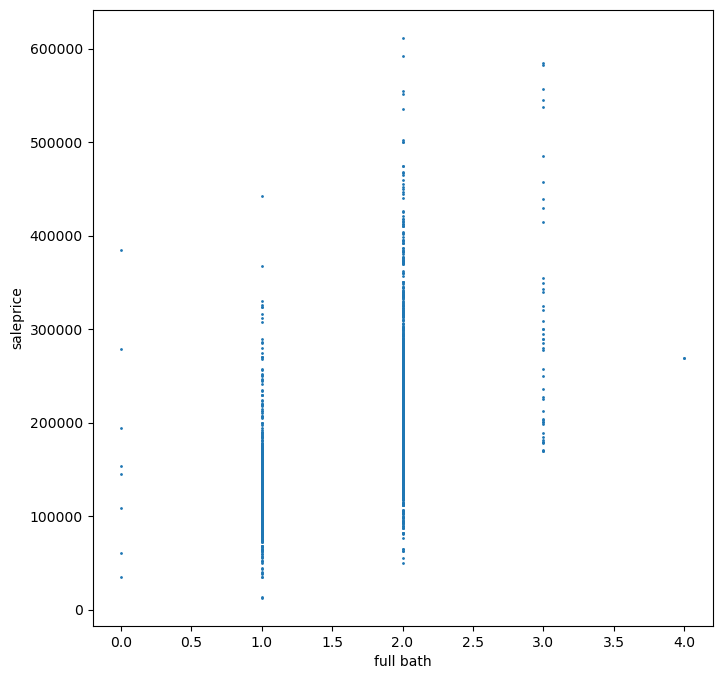

In [98]:
plt.figure(figsize = (8,8))
plt.scatter(train['full_bath'], train['saleprice'], s = 1)
plt.xlabel('full bath')
plt.ylabel('saleprice')

Text(0, 0.5, 'saleprice')

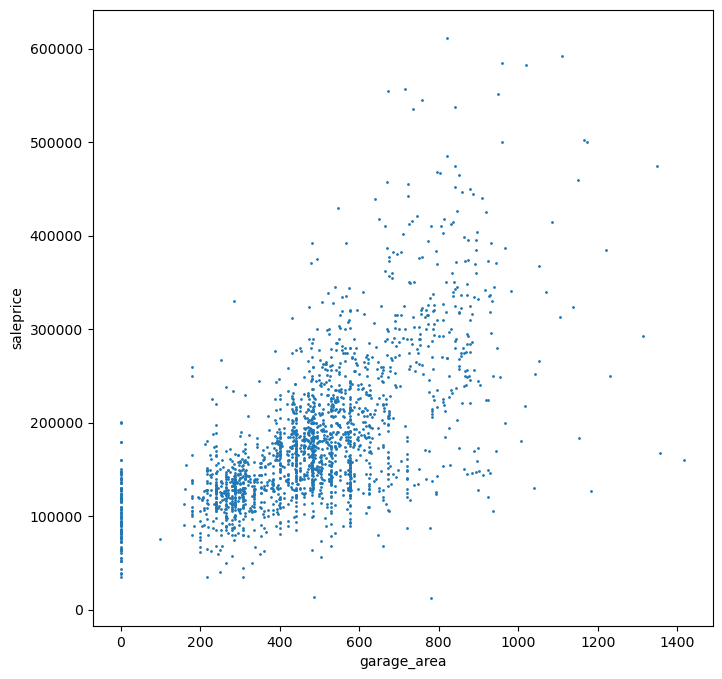

In [99]:
plt.figure(figsize = (8,8))
plt.scatter(train['garage_area'], train['saleprice'], s = 1)
plt.xlabel('garage_area')
plt.ylabel('saleprice')

Text(0, 0.5, 'saleprice')

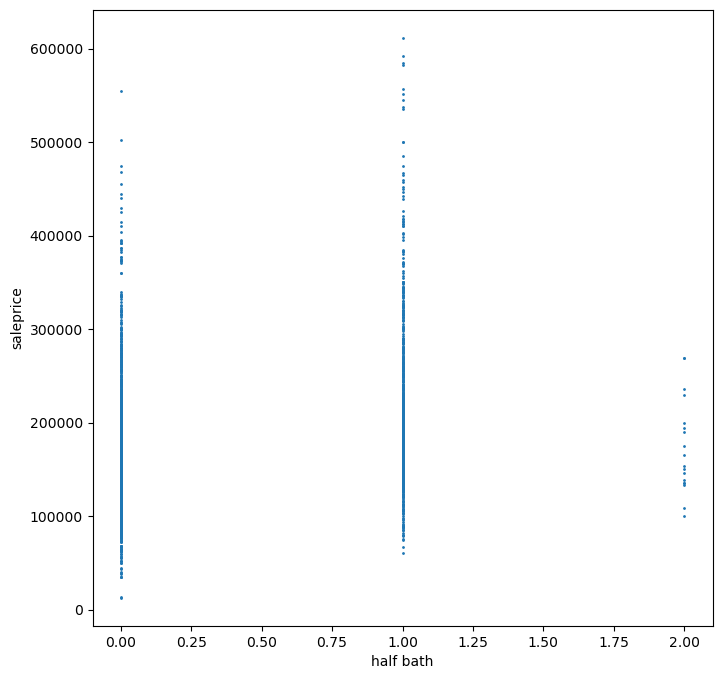

In [100]:
plt.figure(figsize = (8,8))
plt.scatter(train['half_bath'], train['saleprice'], s = 1)
plt.xlabel('half bath')
plt.ylabel('saleprice')

#prob won't use this one.

In [84]:
#Line done so lets try and find some more helpful features.

In [101]:
#train.to_csv('./datasets/train.csv', index = False)